EĞİTİLMİŞ AĞDA OBJE TANIMA

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import os
os.chdir('/gdrive/My Drive/Bilgisayarli_Goru/')

In [3]:
!ls

data		 Metin_Tespiti.ipynb	  Segmentation_Test.ipynb
GAN4.1.ipynb	 Obje_Tanima_Test.ipynb   Segmentation_Train.ipynb
GAN4.2.ipynb	 Obje_Tanima_Train.ipynb  semantic-segmentation-pytorch
keras-retinanet  RetinaNet.ipynb


In [4]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [5]:
%cd keras-retinanet/
!pip install .

/gdrive/My Drive/Bilgisayarli_Goru/keras-retinanet
Processing /gdrive/My Drive/Bilgisayarli_Goru/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168031 sha256=df6ff70757de863169a915244e069db498588258184f91dbefe31aa11032bed7
  Stored in directory: /root/.cache/pip/wheels/c7/81/f3/969e5a8e4a5d210475e092f612ae28fde3a6607fe18122d16b
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=613cc3e9b720046aa527f8cba47de169d89ad795fa8f2a2215a4f4629dd26041
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [6]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import urllib
import os
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [8]:
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')

('pretrained_model.h5', <http.client.HTTPMessage at 0x7f0855651f50>)

In [14]:
model = models.load_model('pretrained_model.h5')

In [12]:
btkclass_names = [l.rstrip() for l in open('keras-retinanet/coco_categories.txt')]
class_names

FileNotFoundError: ignored

In [ ]:
def show_image_with_predictions(img_path, threshold=0.6):
  im = np.array(Image.open(img_path))
  print("im.shape:", im.shape)

  # RGBA resim var ise (PNG)
  im = im[:,:,:3]

  # Retinanet paketinde tanımlı kodlar - resimi işlemeye hazır hale getiriyoruz
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # kutu koordinatlarını resim ile orantılı hale çevirme
  boxes /= scale

  # her tahmin için döngü
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # verdiğimiz sınırın altında kalanları elemek için
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    #Sınıfları al
    class_name = class_names[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]

im.shape: (600, 800, 3)


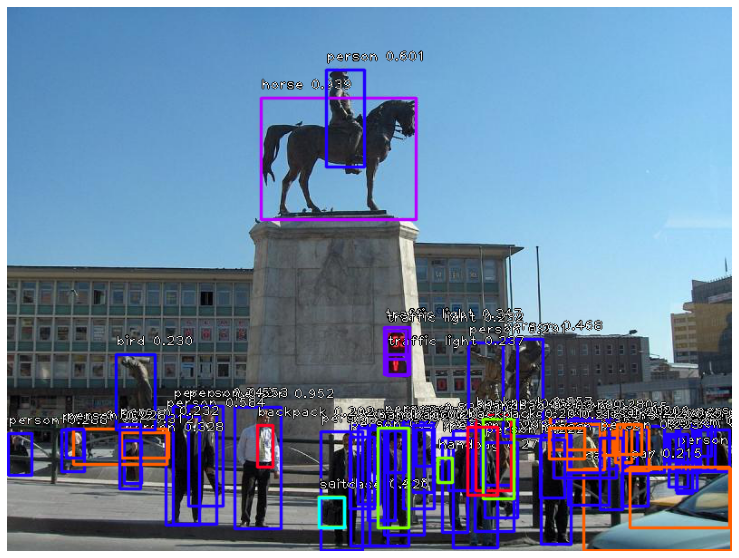

In [ ]:
show_image_with_predictions('keras-retinanet/ulus.jpg', threshold=0.2)